<div>
<h1 align="center">Supervised learning Multiclass classification</h1>
<h2 align="center"> By: Hans Michael Célestin </h2>
<br>

</div>

In [6]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import math

from sklearn import linear_model
from sklearn.datasets import load_iris

import statsmodels.api as sm

In [7]:
iris = load_iris()

In [8]:
X=iris.data
Y = iris.target

In [9]:
iris.DESCR


'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [10]:
iris_data = DataFrame(X,columns= ['Sepal Length','Sepal Width','Petal Length','Petal width'])

In [11]:
iris_target = DataFrame(Y,columns=['Species'])
iris_target

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [12]:
def  flower(num):
    if num == 0:
        return 'Setosa'
    elif num == 1:
        return 'Versocolour'
    else:
        return 'Virginica'

In [13]:
iris_target['Species']=iris_target['Species'].apply(flower)

In [14]:
iris_target

,Species
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa
...,...
145,Virginica
146,Virginica
147,Virginica
148,Virginica


In [15]:
iris =pd.concat([iris_data,iris_target],axis=1)

In [16]:
iris

,Sepal Length,Sepal Width,Petal Length,Petal width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


C:\Users\hansm\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


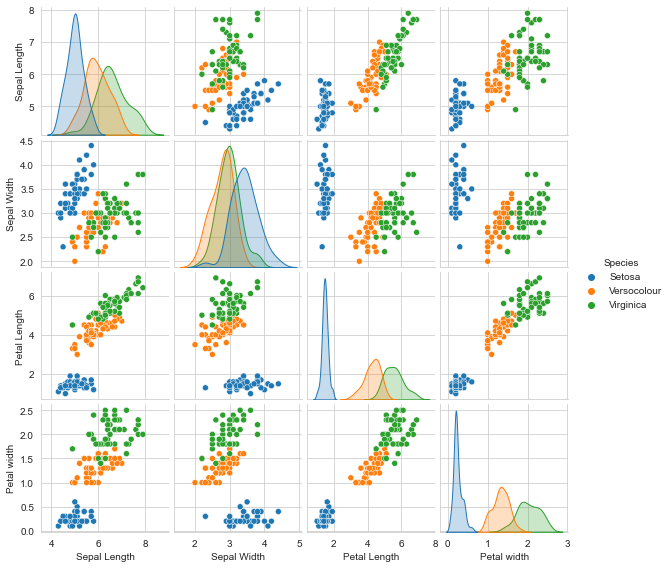

In [17]:
sns.pairplot(iris,hue='Species',size =2)


C:\Users\hansm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Petal Length', ylabel='count'>

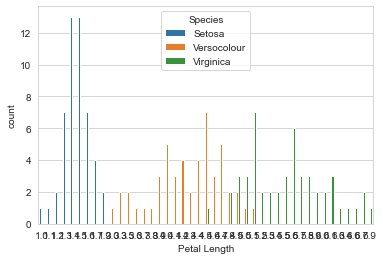

In [18]:
sns.countplot('Petal Length',data=iris,hue='Species')

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [38]:
logreg = LogisticRegression()
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size =0.4,random_state=3)

In [21]:
logreg.fit(X_train,Y_train)

C:\Users\hansm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
from sklearn import metrics


In [23]:
Y_pred = logreg.predict(X_test)

In [24]:
print(metrics.accuracy_score(Y_test,Y_pred))

0.9666666666666667


In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
Knn =KNeighborsClassifier(n_neighbors=6)

In [27]:
Knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=6)

In [28]:
Y_pred =Knn.predict(X_test)


In [29]:
print(metrics.accuracy_score(Y_test,Y_pred))

0.95


In [30]:
Knn = KNeighborsClassifier(n_neighbors=1)

In [31]:
Knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [32]:
Y_pred =Knn.predict(X_test)

In [33]:
print(metrics.accuracy_score(Y_test,Y_pred))

0.9666666666666667


In [34]:
K_range =range(1,21)
accuracy =[]

In [35]:
for k in K_range:
    Knn = KNeighborsClassifier(n_neighbors=k)
    Knn.fit(X_train,Y_train)
    Y_pred =Knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_test,Y_pred))

Text(0, 0.5, 'Testing accuracy')

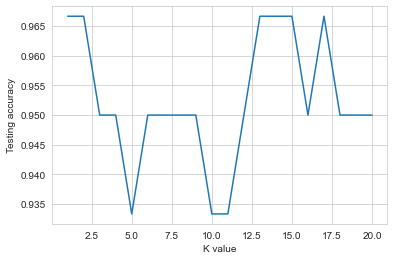

In [36]:
plt.plot(K_range,accuracy)
plt.xlabel('K value')
plt.ylabel('Testing accuracy')